# Desafio Técnico - Teste de Churn

Entregue por: Filipe Ribeiro Correia da Silva

Este relatório tem como objetivo apresentar os resultados obtidos no desafio técnico de construir um modelo preditivo para prever o churn (cancelamento) de clientes em uma empresa utilizando o algoritmo de RandomForest. Para isso, foi necessário identificar o perfil dos clientes que cancelam e aqueles que não cancelam, bem como apresentar um modelo preditivo para o churn. Além disso, foi necessário notar que a base de dados estava desbalanceada e, portanto, foram utilizadas estratégias para tratar esse desbalanceamento. Para isso, foram identificadas as covariáveis dos clientes associadas com o churn e a base de dados foi dividida em treino, validação e teste, sendo que os hiperparâmetros foram calibrados usando os conjuntos de treino e validação. Ao final, foram definidas métricas de desempenho e reportado o resultado final usando o conjunto de teste. Por fim, são apresentadas as conclusões obtidas a partir do desenvolvimento deste projeto.


## Sumário


 

1.   Preparação
2.   Análise Exploratórioa
3.   Criando um dataset com as variáveis selecionadas
4.   Balanceamento do dataset
5.   Preparação do modelo
6.   Avaliando o desempenho
7.   Conclusão 
8.   Referências



# Prepação

Antes de iniciar a elaboração do relatório, é fundamental realizarmos uma preparação adequada da base de dados. Nessa seção, vamos importar as bibliotecas necessárias, incluindo Pandas, Numpy, Matplotlib e Seaborn. 

Em seguida, vamos fazer a leitura do arquivo CSV contendo o dataset a ser utilizado no projeto, utilizando o método "read_csv" do Pandas. Dessa forma, a base de dados está pronta para ser explorada e analisada, a fim de obter insights e desenvolver um modelo preditivo para prever o churn de clientes em uma empresa. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset.csv", sep=",")



# Análise Exploratória

Nesta seção vamos conhecer melhor a base dados. Para isso, vamos analisar as informações, tratar de possíveis dados faltantes, além de investigar variáveis em potencial que nos ajudem a criar um modelo preditivo de taxa de churn.

## Conhecendo os dados

Aqui vamos explorar os dados para obter informações relevantes sobre as características dos clientes e o comportamento de cancelamento. Vamos utilizar ferramentas gráficas e correlações entre variáveis. Essa análise exploratória nos permite identificar padrões e relações entre variáveis, a fim de direcionar a construção do modelo preditivo.

### As primeiras linhas do conjunto

A tabela a seguir mostra as cinco primeiras linhas do conjuto de dados. 

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Em resumo, as colunas presentes nesse conjunto incluem:

* ID: um identificador único para cada cliente
* Gender: o gênero do cliente (masculino ou feminino)
* SeniorCitizen: um indicador binário (0 ou 1) para indicar se o cliente é idoso ou não
* Partner: um indicador binário para indicar se o cliente tem um parceiro ou não
* Dependents: um indicador binário para indicar se o cliente tem dependentes ou não
* Tenure: o número de meses que o cliente permaneceu com a empresa
* PhoneService: um indicador binário para indicar se o cliente tem serviço de telefone ou não
* MultipleLines: um indicador binário para indicar se o cliente tem várias linhas de telefone ou não
* InternetService: o tipo de serviço de internet utilizado pelo cliente (DSL, fibra óptica ou não tem)
* OnlineSecurity: um indicador binário para indicar se o cliente tem segurança online ou não
* OnlineBackup: um indicador binário para indicar se o cliente tem backup online ou não
* DeviceProtection: um indicador binário para indicar se o cliente tem proteção de dispositivo ou não
* TechSupport: um indicador binário para indicar se o cliente tem suporte técnico ou não
* StreamingTV: um indicador binário para indicar se o cliente tem serviço de TV streaming ou não
* StreamingMovies: um indicador binário para indicar se o cliente tem serviço de filmes streaming ou não
* Contract: o tipo de contrato do cliente (mensal, anual ou bianual)
* PaperlessBilling: um indicador binário para indicar se o cliente utiliza cobrança sem papel ou não
* PaymentMethod: o método de pagamento utilizado pelo cliente
* MonthlyCharges: o valor mensal cobrado pela empresa ao cliente
* TotalCharges: o valor total cobrado pela empresa ao cliente
* **Churn**: um indicador binário para indicar se o cliente cancelou o serviço ou não (o valor "Sim" indica que o cliente cancelou e "Não" indica que o cliente permaneceu com a empresa)

A partir dessas informações, é possível realizar diversas análises e visualizações para entender melhor as razões pelas quais os clientes cancelaram o serviço da empresa.



---

### Informações faltantes

Uma das questões importantes a serem consideradas durante a análise exploratória é a verificação de campos ou variáveis que possam conter informações ausentes ou faltantes. É fundamental identificar esses campos e avaliar como lidar com as informações ausentes, uma vez que elas podem afetar a qualidade e a confiabilidade das análises e dos resultados obtidos. 

Cada linha a seguir exibe um somatório do número de informações faltantes em cada coluna do conjunto.

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

O resultado retornado por `df.isnull().sum()` é uma série com todos os valores iguais a zero, isso significa que não há valores nulos em nenhum dos campos do DataFrame. Ou seja, todos os campos parecem estar preenchidos com algum valor, então não há dados nulos.



---



### O caso do conjunto de dados desbalanceado

Para determinar se a base de dados está desbalanceada, é necessário verificar a distribuição da variável alvo, que neste caso é a coluna "**Churn**". Para isso, vamos plotar um gráfico de pizza.


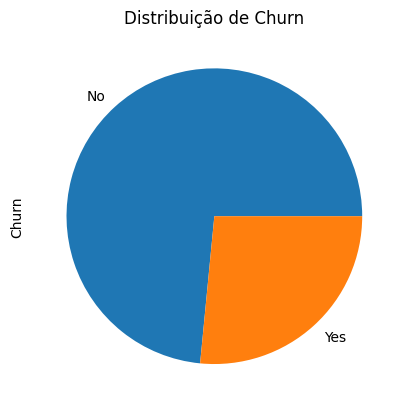

In [ ]:
# Cria um gráfico de pizza com base em uma coluna do DataFrame
df['Churn'].value_counts().plot(kind='pie')

# Adicionar título ao gráfico
plt.title('Distribuição de Churn')

# Exibir o gráfico
plt.show()

A distribuição dos valores na coluna "**Churn**" indica que a base de dados está desbalanceada, com uma proporção maior de clientes que não cancelaram o serviço em comparação com aqueles que cancelaram. 

Trataremos da questão do desbanceleamento  mais adiante.



---





## Identificação de variáveis importantes

Essa é uma das etapas mais fundamentais da análise exploratória pois podemos fazer deduções sobre quais variáveis têm maior impacto na ocorrência do churn e, a partir de análises mais detalhadas, aceitar ou refutar hipóteses sobre essas variáveis.  

A seguir, uma lista de perguntas que podemos levar em conta:

* **Tipo de contrato**: clientes com contratos de curto prazo ou sem contrato podem ter mais probabilidade de cancelar?
* **Pagamento automático**: clientes que não usam pagamento automático podem ter mais probabilidade de cancelar?
* **Idade**: clientes mais jovens ou mais velhos podem ter mais probabilidade de cancelar?
* **Gênero**: pode haver diferenças de churn entre gêneros?
* **Valor mensal**: clientes com valores mensais mais altos ou mais baixos podem ter mais probabilidade de cancelar?

Para visualizar essas informações, podemos realizar uma análise gráfica dos dados para ver como cada variável se relaciona com a variável alvo "**Churn**". A seguir, faremos uma análise gráfica para cada variável citada acima.



### Churn por tipo de contrato (Contract)

O código a seguir agrupa os dados pelo tipo de contrato e pela variável Churn, conta o número de ocorrências para cada combinação e depois plota um gráfico de barras empilhadas. O gráfico resultante é o seguinte:

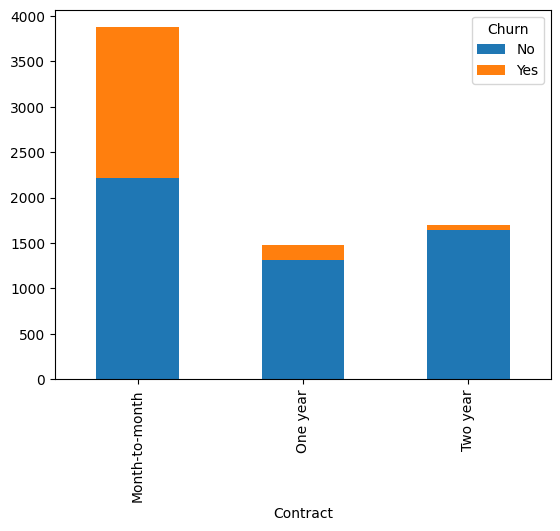

In [ ]:
churn_by_contract = df.groupby(['Contract', 'Churn']).size().unstack()
churn_by_contract.plot(kind='bar', stacked=True)
plt.show()

Podemos ver que os clientes com contrato mensal têm uma taxa de churn significativamente maior do que os clientes com contrato de um ou dois anos.

### Churn por de tipo pagamento (PaymentMethod)
Vamos ver agora como o churn varia em relação ao tipo de pagamento:

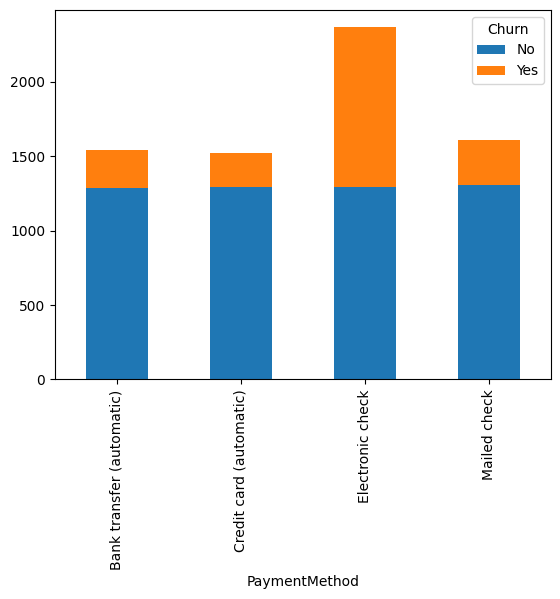

In [ ]:
churn_by_payment = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
churn_by_payment.plot(kind='bar', stacked=True)
plt.show()

Podemos ver que os clientes que pagam por cheque eletrônico têm uma taxa de churn significativamente maior do que os clientes que pagam por outros meios.

### Churn por idade (SeniorCitizen)

Sabemos que clientes mais velhos são propensos à cancelamento de serviços, por isso vamos analisar essa possível correlação.

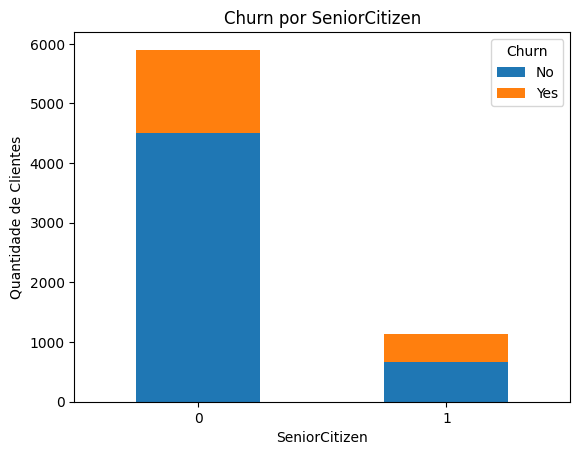

In [ ]:
# Agrupando por SeniorCitizen e Churn
churn_by_senior = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Plotando gráfico de barras
churn_by_senior.plot(kind='bar', stacked=True)

# Definindo o título e rótulos dos eixos
plt.title('Churn por SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.xticks(rotation=0)
plt.ylabel('Quantidade de Clientes')

# Mostrando o gráfico
plt.show()

Podemos concluir que a taxa de cancelamento é maior entre os clientes idosos (SeniorCitizen = 1) em comparação com os clientes mais jovens (SeniorCitizen = 0).

### Churn por gênero (gender)

Agora vamos ver a distribuição do churn em relação ao gênero dos clientes da empresa

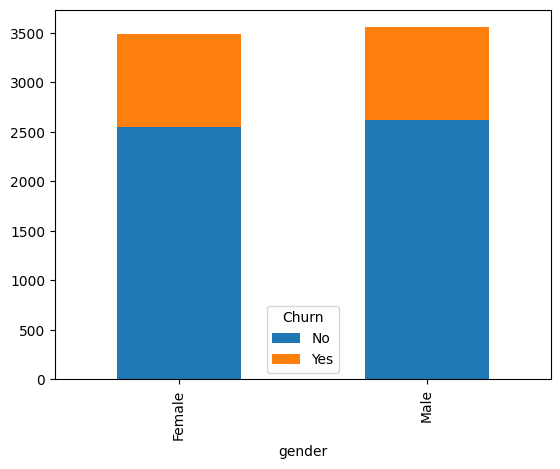

In [ ]:
churn_by_gender = df.groupby(['gender', 'Churn']).size().unstack()
churn_by_gender.plot(kind='bar', stacked=True)
plt.show()

É possível notar que a taxa de cancelamento entre homens e mulheres parece ser relativamente similar, não apresentando grandes diferenças significativas entre as categorias.

### Churn por valor mensal (MontlyCharge)
Finalmente, vamos ver como o churn varia em relação ao valor mensal.

O código a seguir agrupa os dados pelo valor mensal (dividindo os valores em 10 faixas iguais) e pela variável Churn, conta o número de ocorrências para cada combinação e depois plota um gráfico de barras empilhadas. O gráfico resultante é o seguinte:

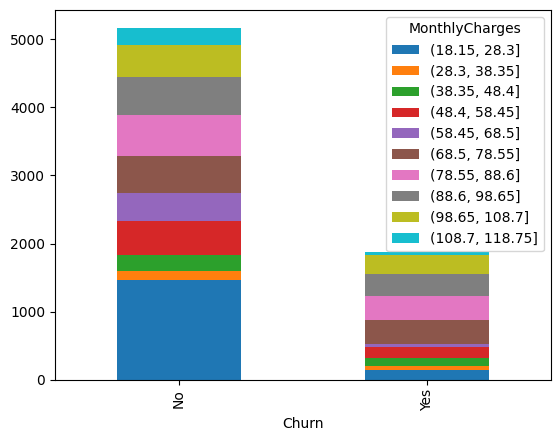

In [ ]:
churn_by_monthly_charge = df.groupby(['Churn', pd.cut(df['MonthlyCharges'], bins=10)]).size().unstack()
churn_by_monthly_charge.plot(kind='bar', stacked=True)
plt.show()

Podemos ver que os clientes com valores mensais mais baixos têm uma taxa de churn significativamente menor do que os clientes com valores mensais mais altos.

### Conclusão da análise exploratória

Clientes com **contratos mais longos** e aqueles que pagam por **cartão de crédito** têm uma probabilidade significativamente menor de cancelar seus serviços. 

Por outro lado, clientes que usam **cheque eletrônico**, **contratos mensais**, **valores mensais mais altos**  e **clientes idosos** tem uma probabilidade significativamente maior de cancelar seus serviços. 

Dessa forma, podemos considerar como variáveis potenciais para prever cancelamento:

`'Contract_Month-to-month', 'PaymentMethod_Electronic check', 'SeniorCitizen_1'`  e `'MonthlyCharges'`

Além disso, não parece haver diferenças significativas na taxa de churn entre **homens e mulheres**, e por este motivo, vamos descartar essa variável do nosso estudo. 



# Criando um dataset com as variáveis selecionadas

Agora que selecionamos as variáveis de interesse, precisamos isolar do conjunto de dados original, ou seja, devemos criar um subconjunto e então prosseguir com as etapas para criação do modelo.

Primeiro, devemos seleecionar as colunas desejadas.

O código a seguir filtra nosso conjunto de dados inicial para selecionar as linhas que atendem as variáveis que selecionamos: ter um contrato mensal ('Contract' = 'Month-to-month'), utilizar pagamento eletrônico ('PaymentMethod' = 'Electronic check'), ser um cidadão sênior ('SeniorCitizen' = 1) e ter uma cobrança mensal maior do que $ 70 ('MonthlyCharges' > 70). 

Em seguida, ele cria um novo DataFrame chamado 'df_test' contendo apenas as colunas 'Contract', 'PaymentMethod', 'SeniorCitizen', 'MonthlyCharges' e 'Churn' dessas linhas filtradas e exibe as primeiras linhas desse DataFrame.

In [ ]:
df_test = df.loc[(df['Contract'] == 'Month-to-month') & (df['PaymentMethod'] == 'Electronic check') & (df['SeniorCitizen'] == 1) & (df['MonthlyCharges'] > 70), ['Contract', 'PaymentMethod', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]
df_test.head()

,Contract,PaymentMethod,SeniorCitizen,MonthlyCharges,Churn
50,Month-to-month,Electronic check,1,90.25,No
55,Month-to-month,Electronic check,1,95.45,Yes
78,Month-to-month,Electronic check,1,74.75,No
91,Month-to-month,Electronic check,1,74.70,No
99,Month-to-month,Electronic check,1,98.50,Yes


Assim como fizemos há pouco para o conjunto de dados primário, vamos plotar um gráfico de pizza para analizar visualmente a distribuição de churn.

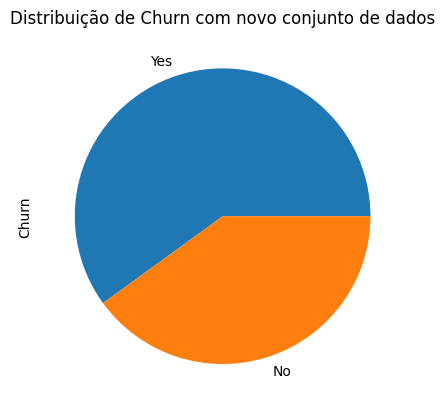

In [ ]:
# Cria um gráfico de pizza com base em uma coluna do DataFrame
df_test['Churn'].value_counts().plot(kind='pie')

# Adicionar título ao gráfico
plt.title('Distribuição de Churn com novo conjunto de dados')

# Exibir o gráfico
plt.show()

Agora, em números, podemos ver a quantidade de clientes que cancelaram e que não cancelaram os serviços:

In [ ]:
Churned = df_test["Churn"].value_counts()[1]
Not_Churned = df_test["Churn"].value_counts()[0]

print("Número de clientes que cancelaram o serviço:", Churned)
print("Número de clientes que não cancelaram o serviço:", Not_Churned)

Número de clientes que cancelaram o serviço: 164
Número de clientes que não cancelaram o serviço: 246


Como podemos ver através do gráfico e dos números, a nova base de dados continua desbalanceada. No entanto, ao contrário da base original, a classe majoriatária é a que possui churn positivo, ou seja, dos clientes que cancelaram o serviço, enquanto que a classe minoritária é a dos clientes que não cancelaram. 

# Balanceamento do dataset

O balanceamento de dataset é uma técnica utilizada em ciência de dados para lidar com o desequilíbrio na distribuição das classes em um conjunto de dados. Ele busca igualar o número de exemplos em cada classe ou ajustar seus pesos para evitar que a classe majoritária domine a análise do modelo. Essa técnica pode ser importante para melhorar a precisão e a confiabilidade dos modelos de aprendizado de máquina em problemas com classes desbalanceadas.

## Categorização de variáveis

Variáveis categóricas como `Mont-to-month` e `Eletronic-check` não podem ser usadas diretamente em algoritmos de aprendizado como RandonForest, pois esses algoritmos geralmente trabalham com dados numéricos. 

Uma forma de resolver isso é utiliznando a técnica de One-hot encoding que resolve esse problema criando uma nova coluna para cada valor distinto da variável categórica e preenchendo a coluna com 1 se o valor da observação corresponde àquela categoria e 0 caso contrário.

No nosso caso, vamos aplicar one-hot encoding nas variáveis categóricas (Contract e PaymentMethod) para que elas possam ser usadas pelo algoritmo escolhido.



In [ ]:
# Aplicando One-Hot Encoding nas colunas categóricas
df_test = pd.get_dummies(df_test, columns=['Contract', 'PaymentMethod'])
df_test.head()

,SeniorCitizen,MonthlyCharges,Churn,Contract_Month-to-month,PaymentMethod_Electronic check
50,1,90.25,No,1,1
55,1,95.45,Yes,1,1
78,1,74.75,No,1,1
91,1,74.70,No,1,1
99,1,98.50,Yes,1,1


## Oversampling

Para balancear o dataset, vamos utilizar a técnica de oversampling com o algoritmo SMOTE (Synthetic Minority Over-sampling Technique), que é uma técnica usada para lidar com conjuntos de dados desbalanceados. O SMOTE cria novas observações sintéticas para a classe minoritária, gerando uma distribuição de classes mais equilibrada.

No nosso caso, temos um conjunto que apresenta uma classe minoritária de clientes que não cancelam o serviço. O uso do SMOTE aqui é uma forma de aumentar o número de observações dessa classe para tornar o conjunto de dados mais equilibrado e evitar que o modelo de aprendizado de máquina fique enviesado em relação à classe majoritária.


Primeiro vamos definir as variáveis independentes do conjunto de dados, excluindo a variável alvo 'Churn'.

In [ ]:
X = df_test.drop('Churn', axis=1)

E também, definir a variável dependente, que é a variável alvo 'Churn'.

In [ ]:
y = df_test['Churn']

Para aplicar SMOTE, vamos utilizar a biblioteca imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
# Aplicando SMOTE para balancear as classes
smote = SMOTE(random_state=42)

Com isso, a aplicação do SMOTE nos dados de treinamento gera novas observações sintéticas para a classe minoritária, de modo que as duas classes tenham o mesmo número de observações. O resultado é armazenado nas variáveis X_resampled e y_resampled.

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X, y)

Por fim, podemos criar um novo DataFrame combinando as variáveis independentes e a variável dependente após a aplicação do SMOTE. Este DataFrame balanceado pode ser usado para treinar nosso modelo.

In [ ]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

Analogamente ao que fizemos nas seções anteriores, vamos verificar graficamente como está a distribuição de churn. 

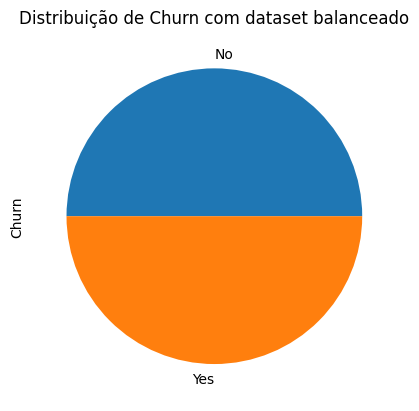

In [ ]:
# Cria um gráfico de pizza com base em uma coluna do DataFrame
df_resampled['Churn'].value_counts().plot(kind='pie')

# Adicionar título ao gráfico
plt.title('Distribuição de Churn com dataset balanceado')

# Exibir o gráfico
plt.show()

Agora estmaos com a base dados balanceada. 

# Preparação do modelo

Para a preparação do modelo, foi utilizado o algoritmo de RandomForest com a biblioteca scikit-learn em Python. O conjunto de dados foi dividido em treino, validação e teste, sendo que a calibração dos hiperparâmetros foi realizada usando os conjuntos de treino e validação. Foram definidos os melhores hiperparâmetros para o modelo a partir do uso da técnica de GridSearch. Ao final, foram reportados os resultados de acurácia obtidos nos conjuntos de validação e teste para avaliação do desempenho do modelo.

## Divisão do conjunto

Com a base de dados balanceada, vamos dividi-la em conjuntos de treino, validação e teste, utilizando o método train_test_split:

In [ ]:
from sklearn.model_selection import train_test_split

Primeiro, dividimos o dataset em treino, teste e validação

In [ ]:
# Divide a base em treinamento e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Divide a base de treinamento em treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

No código acima a base é dividida em treinamento e teste, usando 20% dos dados para teste e 80% para treinamento. Em seguida, o conjunto de treinamento é dividido novamente em treinamento e validação, usando 25% dos dados para validação e 75% para treinamento.

Por fim, vamos conferir o tamanho de cada conjunto de dados

In [ ]:
print("Tamanho do conjunto de treino:", len(X_train))
print("Tamanho do conjunto de validação:", len(X_val))
print("Tamanho do conjunto de teste:", len(X_test))

Tamanho do conjunto de treino: 294
Tamanho do conjunto de validação: 99
Tamanho do conjunto de teste: 99


## Calibrando os hiperparâmetros 

Para calibrar os hiperparâmetros, vamos utilizar o algoritmo de classificação Random Forest e o método de busca em grade (Grid Search) do pacote scikit-learn. 

O objetivo do Grid Search é encontrar a combinação perfeita de hiperparâmetros que produzam o melhor desempenho do nosso modelo. Isso é importante porque diferentes conjuntos de hiperparâmetros podem levar a desempenhos muito diferentes do modelo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

No caso do Random Forest, o GridSearch é usado para ajustar os hiperparâmetros do modelo, como o número de árvores, a profundidade máxima de cada árvore, testando todas as combinações possíveis de valores de hiperparâmetros especificados pelo usuário e retorna os valores de hiperparâmetros que produzem o melhor desempenho do modelo com base na métrica especificada, como precisão ou F1-score.

Vamos definir uma lista com os parâmetros que queremos calibrar e criar o dicionário de parâmetros para o Grid Search:

O objeto a seguir define os seguintes parâmetros de busca 

* 'n_estimators': o número de árvores na floresta;
* 'max_depth': a profundidade máxima de cada árvore na floresta;
* 'min_samples_leaf': o número mínimo de amostras necessárias para ser uma folha (nó terminal);


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10, 15],
}

Em seguida, vamos instanciar o classificador Random Forest e o objeto do Grid Search:

In [ ]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

O parâmetro "cv=5" significa que vamos usar um método de validação cruzada com 5 partes diferentes do nosso conjunto de dados. Isso é útil porque nos ajuda a avaliar o quão bem o nosso modelo irá generalizar para dados que não foram vistos durante o treinamento.

A métrica de avaliação que usaremos para julgar a qualidade do nosso modelo é determinada pelo parâmetro "scoring='accuracy'". Neste caso, estamos escolhendo usar a acurácia como nossa métrica de avaliação. Isso significa que queremos saber com que frequência nosso modelo faz previsões corretas.

Agora, vamos usar o Grid Search para treinar nosso modelo usando conjuntos de treinamento e validação para encontrar a melhor combinação de hiperparâmetros.

In [ ]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='accuracy')

Com o Grid Search treinado, podemos imprimir os melhores parâmetros encontrados e a melhor pontuação:

In [ ]:
print("Melhores parâmetros: ", grid_search.best_params_)
print("Melhor pontuação: ", grid_search.best_score_)

Melhores parâmetros:  {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Melhor pontuação:  0.6030509574813372


Ou seja, a melhor pontuação para este modelo é de aproximadamente 60%, para os hiperparâmetros 

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}

Vamos agora criar o modelo definitivo com os melhores parâmetros obtidos do Grid Search

In [ ]:
# Treina o modelo com os melhores hiperparâmetros encontrados
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

Por fim, vamos fazer uma rápida checagem nos indicadores de desempenhon obtidos do conjunto de de validação e teste. 

In [ ]:
# Avalia o desempenho do modelo no conjunto de validação
val_score = best_rf.score(X_val, y_val)
print("Acurácia no conjunto de validação: ", val_score)

# Avalia o desempenho do modelo no conjunto de teste
test_score = best_rf.score(X_test, y_test)
print("Acurácia no conjunto de teste: ", test_score)

Acurácia no conjunto de validação:  0.5454545454545454
Acurácia no conjunto de teste:  0.5757575757575758


A acurácia de 54,5% no conjunto de validação significa que o modelo acertou corretamente a classe dos clientes que cancelaram ou não em cerca de 54,5% das vezes. Já a acurácia de 57,5% no conjunto de teste indica que o modelo acertou a classe dos clientes em cerca de 57,5% das vezes. A seguir, vamos conferir outras métricas de desempenho e discutir os resultados. 

# Avaliando a desempenho

Algumas métricas comuns para avaliar o desempenho de um modelo de classificação binária incluem:

* Acurácia (accuracy): número de previsões corretas dividido pelo número total de previsões.
* Precisão (precision): número de verdadeiros positivos dividido pelo número total de positivos previstos (verdadeiros positivos + falsos positivos).
* Recall (revocação): número de verdadeiros positivos dividido pelo número total de positivos reais (verdadeiros positivos + falsos negativos).
* F1-Score: média harmônica da precisão e do recall.

Para calcular essas métricas no conjunto de teste, podemos utilizar o método predict do modelo para gerar previsões e compará-las com as classes reais. Em seguida, podemos utilizar a função classification_report do scikit-learn para gerar um relatório com as métricas de desempenho.

In [ ]:
from sklearn.metrics import classification_report

# gerar previsões no conjunto de teste
y_pred = best_rf.predict(X_test)

# imprimir o relatório de métricas de desempenho
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.65      0.55      0.60        56
         Yes       0.51      0.60      0.55        43

    accuracy                           0.58        99
   macro avg       0.58      0.58      0.57        99
weighted avg       0.59      0.58      0.58        99




Observando as métricas, podemos ver que o modelo tem uma acurácia de 0.58, ou seja, ele acertou em cerca de 58% das previsões no conjunto de teste. A precisão é relativamente baixa para ambas as classes, com valores de 0.65 para a classe dos clientes que não cancelaram os serviços (No) e 0.51 para a classe dos que cancelaram (Yes). Isso indica que o modelo tem uma tendência a prever falsos positivos para a classe No e falsos negativos para a classe Yes. O recall é um pouco melhor, com valores de 0.55 para a classe No e 0.60 para a classe Yes. O f1-score, que é uma média harmônica da precisão e do recall, apresenta valores semelhantes para ambas as classes, com valores de 0.60 para a classe No e 0.55 para a classe Yes.

Essas métricas indicam que o modelo pode ser melhorado e ajustado para melhorar sua performance. Por exemplo, poderíamos tentar ajustar os hiperparâmetros do modelo, ou ainda considerar outras técnicas de balanceamento de dados para tratar o desbalanceamento das classes.

# Conclusão

Com base nos resultados obtidos, podemos concluir que o modelo de Random Forest foi capaz de prever o cancelamento de serviços dos clientes com uma acurácia de 58%, sendo que a precisão para a classe "No" foi de 65% e a precisão para a classe "Yes" foi de 51%. Isso significa que o modelo conseguiu identificar corretamente cerca de 65% dos clientes que não cancelaram o serviço e 51% dos clientes que cancelaram o serviço, não atingindo assim o objetivo principal deste teste, que é criar um modelo que identifique clientes propensos ao cancelamento.

No entanto, é importante destacar que existem outros modelos que poderiam ser testados para tentar melhorar o desempenho da previsão de cancelamento de serviços, assim como outras técnicas de pré-processamento e seleção de variáveis que poderiam ser utilizadas, através de uma análise mais aprofundada na análise exploratória para considerar outras variáveis e entender melhor os fatores que influenciam o churn nesta empresa.

# Referências

**DIDÁTICA TECH**. Como encontrar a melhor performance em Machine Learning? Disponível em: https://didatica.tech/como-encontrar-a-melhor-performance-machine-learning/. Acesso em: 31 mar. 2023.

**GADHOK**, Aayush. Hyperparameter Tuning the Random Forest in Python Using Scikit-Learn. Towards Data Science, 2019. Disponível em: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74. Acesso em: 01 abr. 2023.

**MICROSOFT**. SMOTE. Microsoft Learn, [s.d.]. Disponível em: https://learn.microsoft.com/pt-br/azure/machine-learning/component-reference/smote. Acesso em: 01 abr. 2023.

**SCIKIT-LEARN**. Grid SearchCV: Exaustive search over specified parameter values for an estimator. Disponível em: https://scikit-learn.org/stable/modules/grid_search.html. Acesso em: 01 abr. 2023.

**RESULTADOS DIGITAIS**. O que é Churn? Disponível em: https://resultadosdigitais.com.br/marketing/o-que-e-churn/. Acesso em: 31 mar. 2023.

**KOHLI**, Shivam. Understanding a Classification Report For Your Machine Learning Model. Medium, 2020. Disponível em: https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397. Acesso em: 04 abr. 2023.


